<a href="https://colab.research.google.com/github/steinnberg/Cancer_classification_TensorFlow_ANN/blob/main/Cancer_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cancer_classification.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


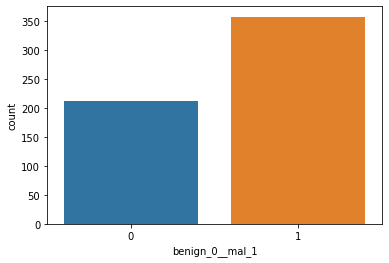

In [ ]:
sns.countplot(x='benign_0__mal_1',data=df)

In [ ]:
df.corr()['benign_0__mal_1']

mean radius               -0.730029
mean texture              -0.415185
mean perimeter            -0.742636
mean area                 -0.708984
mean smoothness           -0.358560
mean compactness          -0.596534
mean concavity            -0.696360
mean concave points       -0.776614
mean symmetry             -0.330499
mean fractal dimension     0.012838
radius error              -0.567134
texture error              0.008303
perimeter error           -0.556141
area error                -0.548236
smoothness error           0.067016
compactness error         -0.292999
concavity error           -0.253730
concave points error      -0.408042
symmetry error             0.006522
fractal dimension error   -0.077972
worst radius              -0.776454
worst texture             -0.456903
worst perimeter           -0.782914
worst area                -0.733825
worst smoothness          -0.421465
worst compactness         -0.590998
worst concavity           -0.659610
worst concave points      -0

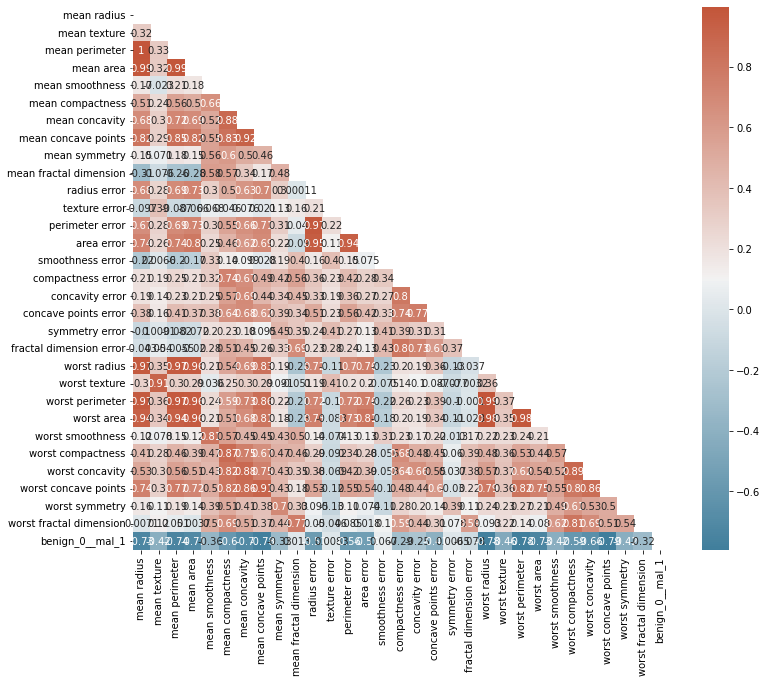

In [ ]:
corr = df.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(12, 10))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

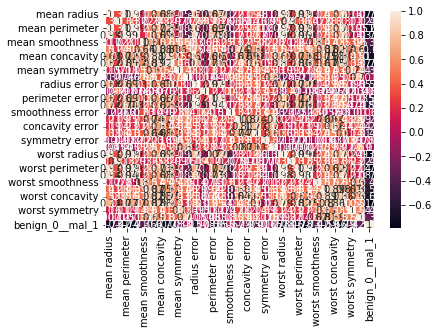

In [ ]:
sns.heatmap(corr, annot=True)

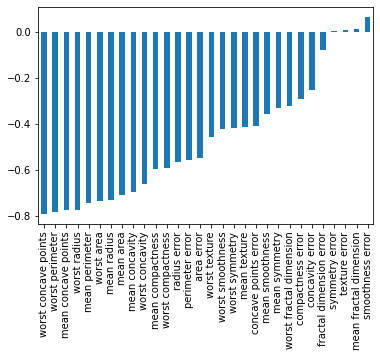

In [ ]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

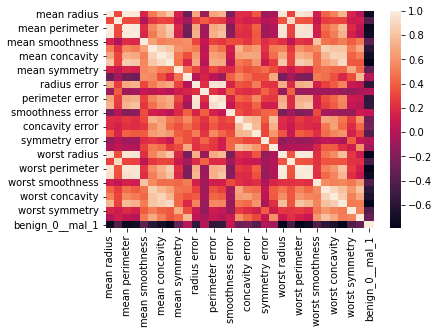

In [ ]:
sns.heatmap(df.corr())

In [ ]:
X= df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
X_train.shape

(426, 30)

In [ ]:
model = Sequential()


model.add(Dense(30, activation='relu')) #input
model.add(Dense(15, activation='relu')) #hidden

model.add(Dense(1, activation='sigmoid')) #hidden
#model.add(Dense(19, activation='relu')) #output
#model.add(Dense(1))  #car prediction d un prix de vente

model.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
model.fit(x= X_train, y=y_train, validation_data=(X_test, y_test), epochs=600)

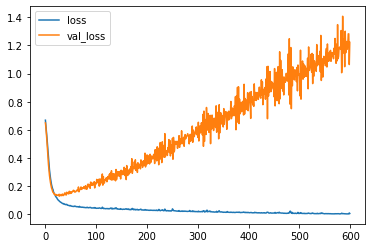

In [ ]:
losses = pd.DataFrame(model.history.history)

losses.plot()

In [ ]:
model = Sequential()


model.add(Dense(30, activation='relu')) #input
model.add(Dense(15, activation='relu')) #hidden

model.add(Dense(1, activation='sigmoid')) #hidden

model.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
help(EarlyStopping)

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=25, verbose=1)

In [ ]:
model.fit(x= X_train, y=y_train, validation_data=(X_test, y_test), epochs=600, 
          callbacks  = [early_stop])

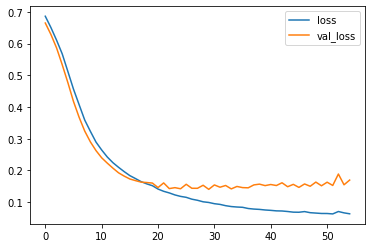

In [ ]:
losses = pd.DataFrame(model.history.history)

losses.plot()

**Dropout method**

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
model = Sequential()


model.add(Dense(30, activation='relu')) #input
model.add(Dropout(rate=0.5))

model.add(Dense(15, activation='relu')) #hidden
model.add(Dropout(rate=0.5))

model.add(Dense(1, activation='sigmoid')) #hidden

model.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
model.fit(x= X_train, y=y_train, validation_data=(X_test, y_test), epochs=600, 
          callbacks  = [early_stop])

Epoch 1/600
14/14 [==============================] - 1s 12ms/step - loss: 0.6953 - val_loss: 0.6739
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6903 - val_loss: 0.6628
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6662 - val_loss: 0.6452
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6490 - val_loss: 0.6255
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6270 - val_loss: 0.6039
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6048 - val_loss: 0.5764
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5969 - val_loss: 0.5403
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5770 - val_loss: 0.5063
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5197 - val_loss: 0.4742
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5098 - val_loss: 0.4443
Epoch 11

In [ ]:
help(Dropout)

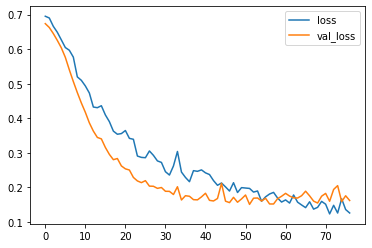

In [ ]:
losses = pd.DataFrame(model.history.history)

losses.plot()

In [ ]:
predictions = (model.predict(X_test) > 0.5).astype('int32')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92        55
           1       0.99      0.90      0.94        88

    accuracy                           0.93       143
   macro avg       0.92      0.94      0.93       143
weighted avg       0.94      0.93      0.93       143



In [ ]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 9 79]]
